In [1]:
import pickle

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

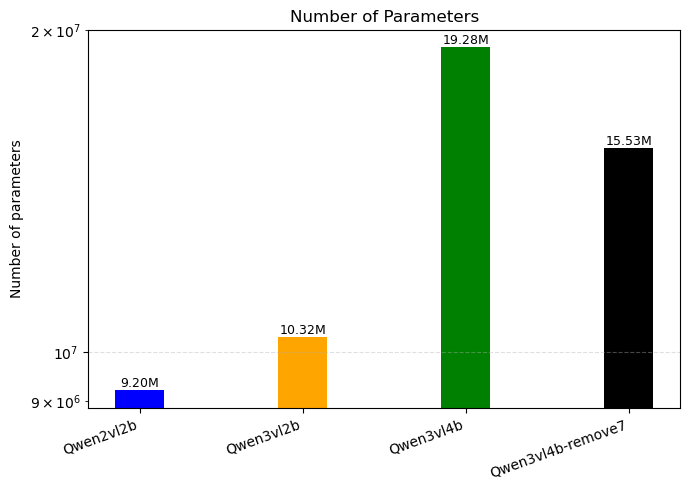

In [3]:
# -----------------------------
# Data
# -----------------------------
data = {
    "Qwen2vl2b": 9_203_712,
    "Qwen3vl2b": 10_321_920,
    "Qwen3vl4b": 19_279_872,
    "Qwen3vl4b-remove7": 15_531_008,
}

# Keep order as provided
models = list(data.keys())
params = list(data.values())

# -----------------------------
# Helper functions
# -----------------------------
def human_format(n: int) -> str:
    """Convert large integer to human-readable format."""
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.2f}B"
    if n >= 1_000_000:
        return f"{n/1_000_000:.2f}M"
    if n >= 1_000:
        return f"{n/1_000:.2f}K"
    return str(n)

def annotate_bars(ax, bars):
    """Annotate bars with absolute value and percentage vs first model."""
    base = params[0]
    for i, b in enumerate(bars):
        v = b.get_height()
        pct = (v - base) / base * 100.0
        label = f"{human_format(int(v))}\n({pct:+.1f}%)"
        ax.text(
            b.get_x() + b.get_width() / 2,
            v,
            label,
            ha="center",
            va="bottom",
            fontsize=9,
        )

# # -----------------------------
# # Plot 1: Bar chart
# # -----------------------------
# plt.figure(figsize=(10, 5))
# ax = plt.gca()
# bars = ax.bar(models, params)
# ax.set_title("Model Parameters (Bar Chart)")
# ax.set_ylabel("Number of parameters")
# ax.grid(axis="y", linestyle="--", alpha=0.4)

# annotate_bars(ax, bars)
# plt.xticks(rotation=20, ha="right")
# plt.tight_layout()
# plt.show()

# # -----------------------------
# # Plot 2: Line chart
# # -----------------------------
# plt.figure(figsize=(10, 5))
# ax = plt.gca()
# ax.plot(models, params, marker="o")
# ax.set_title("Model Parameters (Line Chart)")
# ax.set_ylabel("Number of parameters")
# ax.grid(True, linestyle="--", alpha=0.4)

# # Annotate points
# for x, y in zip(models, params):
#     ax.text(x, y, human_format(y), ha="center", va="bottom", fontsize=9)

# plt.xticks(rotation=20, ha="right")
# plt.tight_layout()
# plt.show()

# -----------------------------
# Plot 3: Log-scale bar chart
# -----------------------------
plt.figure(figsize=(7, 5))
ax = plt.gca()
bars = ax.bar(models, params, width=0.3, color=["blue", "orange", "green", "black"])
ax.set_yscale("log")
ax.set_title("Number of Parameters")
ax.set_ylabel("Number of parameters")
ax.grid(axis="y", linestyle="--", alpha=0.4)

# Annotate bars (still show absolute values)
for b in bars:
    v = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        v,
        human_format(int(v)),
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()
